In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
try:
    df = pd.read_csv('bangla_dataset.csv', encoding='utf-8')  # Adjust encoding if needed
except UnicodeDecodeError:
    df = pd.read_csv('bangla_dataset.csv', encoding='latin-1')  # Fallback encoding

# Display basic dataset information
print("="*50)
print("Dataset Shape:", df.shape)
print("="*50)
print("\nFirst 5 Rows:")
print("-"*50)
print(df.head())

# Check column names and missing values
print("\n" + "="*50)
print("Column Names:", df.columns.tolist())
print("-"*50)
print("Missing Values:")
print(df.isnull().sum())

# Analyze class distribution
print("\n" + "="*50)
print("Class Distribution:")
print(df['binary_label'].value_counts())
print("-"*50)
print("Class Proportions:")
print(df['binary_label'].value_counts(normalize=True))

Dataset Shape: (43389, 2)

First 5 Rows:
--------------------------------------------------
                                                Text  binary_label
0  ১ থেকে ১০০ এর মধ্যে আপনার প্রিয় নম্বর কি? এর উ...             0
1  ওএমজি ওএমজি ওএমজি হ্যাঁ হ্যাঁ এটি ... এটি নিখু...             0
2  এই ছুটির দিনটি একটি বোর্ডে পেরেক করা একজনকে উদ...             1
3  সেই রাজাকার বাহিনী আর জঙ্গী বাহিনী বঙ্গবন্ধু ক...             1
4  হ্যাঁ আমি বালিশগুলি লাইভ জার্নাল জারক রোটেশনগু...             1

Column Names: ['Text', 'binary_label']
--------------------------------------------------
Missing Values:
Text            0
binary_label    0
dtype: int64

Class Distribution:
binary_label
0    23874
1    19515
Name: count, dtype: int64
--------------------------------------------------
Class Proportions:
binary_label
0    0.550232
1    0.449768
Name: proportion, dtype: float64


In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer

# Load dataset
df = pd.read_csv('bangla_dataset.csv', encoding='utf-8')

# Advanced Bengali text cleaning
def clean_bengali_text(text):
    # Keep Bengali characters and compound symbols
    text = re.sub(r'[^\u0980-\u09FF\u09BC\u09BE-\u09CC\s]', '', text)

    # Normalize ZWNJ (Zero Width Non-Joiner)
    text = re.sub(r'\u200C', ' ', text)

    # Remove single characters
    text = re.sub(r'\b[\u0980-\u09FF]\b', '', text)

    return text.strip()

# Apply cleaning
df['cleaned_text'] = df['Text'].apply(clean_bengali_text)

# Bengali-specific vectorization
vectorizer = TfidfVectorizer(
    token_pattern=r'[\u0980-\u09FF]{2,}',  # Minimum 2 Bengali characters
    ngram_range=(1, 3),
    max_features=1000,
    stop_words=['এবং', 'কিন্তু', 'যা', 'এই', 'হয়েছে', 'আমি']  # Custom stopwords
)

X = vectorizer.fit_transform(df['cleaned_text'])

# Display meaningful features
print("Meaningful Features:")
print([word for word in vectorizer.get_feature_names_out() if len(word) > 1][:20])

# Verify with sample text
sample_text = "সত্যিকারের বন্ধু চোদা"
cleaned = clean_bengali_text(sample_text)
vectorized = vectorizer.transform([cleaned])

print("\nSample Text Features:")
print([(word, val) for word, val in zip(vectorizer.get_feature_names_out(),
                                      vectorized.toarray()[0]) if val > 0])

# Show random rows from the vectorized DataFrame
# Convert the sparse matrix to a DataFrame for easier inspection
X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Randomly sample 5 rows from the DataFrame
random_rows = X_df.sample(n=5, random_state=42)  # Change n to the number of rows you want to see
print("\nRandom Rows from the Vectorized Data:")
print(random_rows)


Meaningful Features:
['অত', 'অতযন', 'অতি', 'অথচ', 'অথবা', 'অদ', 'অধ', 'অন', 'অন অন', 'অন আছে', 'অন করি', 'অন গলো', 'অন দর', 'অন ধনযব', 'অনতত', 'অনভব', 'অনযতম', 'অনসরণ', 'অনি', 'অনে']

Sample Text Features:
[('বনু', 0.7826795522537504), ('সত', 0.6224248697504532)]

Random Rows from the Vectorized Data:
        অত  অতযন  অতি  অথচ  অথবা   অদ   অধ        অন  অন অন  অন আছে  ...   ৎস  \
16343  0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.350582    0.0     0.0  ...  0.0   
18251  0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.000000    0.0     0.0  ...  0.0   
42169  0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.247925    0.0     0.0  ...  0.0   
36434  0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.000000    0.0     0.0  ...  0.0   
40469  0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.174775    0.0     0.0  ...  0.0   

        য়গ  য়গা   য়ন  য়না   য়ম   য়র  য়রে   ১০  ১০০  
16343  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
18251  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
42169  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 


Training and Evaluating Ensemble Voting Classifier...

Classification Report for Ensemble Voting Classifier:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4768
           1       0.83      0.83      0.83      3910

    accuracy                           0.85      8678
   macro avg       0.85      0.85      0.85      8678
weighted avg       0.85      0.85      0.85      8678



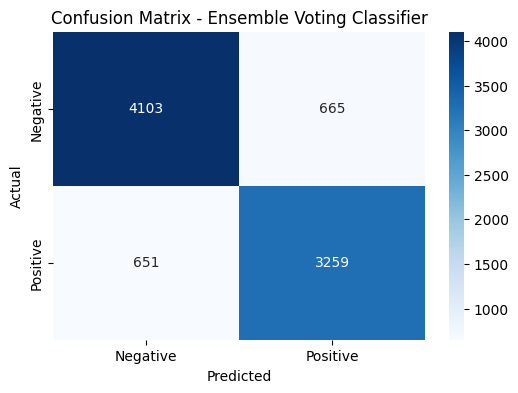

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
df = pd.read_csv('bangla_dataset.csv', encoding='utf-8')

# Advanced Bengali text cleaning
def clean_bengali_text(text):
    # Keep only Bengali characters and spaces, remove other characters and digits
    text = re.sub(r'[^\u0980-\u09FF\s]', '', text)

    # Normalize ZWNJ (Zero Width Non-Joiner) to spaces
    text = re.sub(r'\u200C', ' ', text)

    # Remove excessive whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Apply cleaning
df['cleaned_text'] = df['Text'].apply(clean_bengali_text)

# Define features and target variable
X = df['cleaned_text']
y = df['binary_label']  # Assuming 'binary_label' is the target column

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the vectorizer
vectorizer = TfidfVectorizer(
    token_pattern=r'[\u0980-\u09FF]{2,}',  # Minimum 2 Bengali characters
    ngram_range=(1, 3),                    # Unigrams to trigrams
    max_features=1000,                     # Limit to top 1000 features
    stop_words=['এবং', 'কিন্তু', 'যা', 'এই', 'হয়েছে', 'আমি']  # Custom stopwords
)

# Define the models for ensemble
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC(probability=True)),  # SVM requires probability=True for voting
    ('Decision Tree', DecisionTreeClassifier()),
]

# Create the ensemble VotingClassifier
ensemble_model = VotingClassifier(estimators=models, voting='soft')  # 'soft' voting uses probabilities

# Function to build, evaluate the ensemble model, and plot confusion matrix
def build_and_evaluate_model(model_name, model):
    print(f"\nTraining and Evaluating {model_name}...")

    # Create the pipeline
    pipeline = Pipeline([
        ('vectorizer', vectorizer),  # TfidfVectorizer for text data
        ('model', model)             # The ensemble model
    ])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test, y_pred))

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Evaluate the ensemble model
build_and_evaluate_model("Ensemble Voting Classifier", ensemble_model)
